In [1]:
import signac
from cmeutils.structure import gsd_rdf

import matplotlib.pyplot as plt
import numpy as np
import gsd.hoomd

In [2]:
project = signac.get_project("../coarse-grain-sims/crystals/polybinder-flow/")

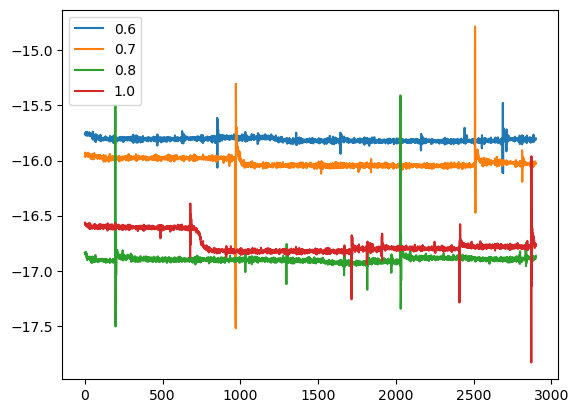

In [3]:
fig = plt.figure()
for ti_ratio, jobs in project.find_jobs().groupby("ekk_weight"):
    for job in jobs:
        with gsd.hoomd.open(job.fn("sim_traj.gsd")) as traj:
            snap = traj[0]
            N = snap.particles.N
        data = np.genfromtxt(job.fn("sim_traj.txt"), names=True)
        pe = data["mdcomputeThermodynamicQuantitiespotential_energy"][100:]
        plt.plot(pe/N, label=ti_ratio)
    
plt.legend()
plt.show()

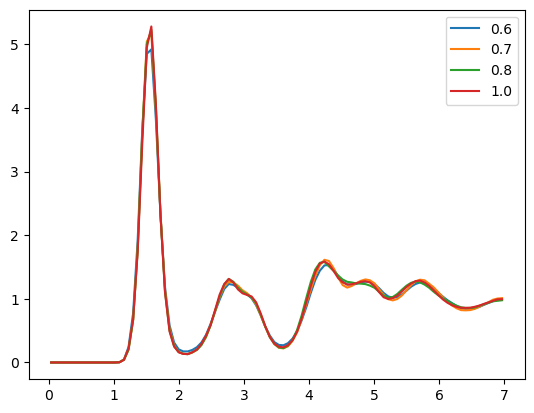

In [6]:
fig = plt.figure()
for ti_ratio, jobs in project.find_jobs().groupby("ekk_weight"):
    for job in jobs:
        rdf, N = gsd_rdf(
            gsdfile=job.fn("sim_traj.gsd"),
            start=-20,
            stop=-1,
            A_name="E",
            B_name="E",
            r_max=7
        )
        plt.plot(rdf.bin_centers, rdf.rdf * N, label=ti_ratio)
    
plt.legend()
plt.show()

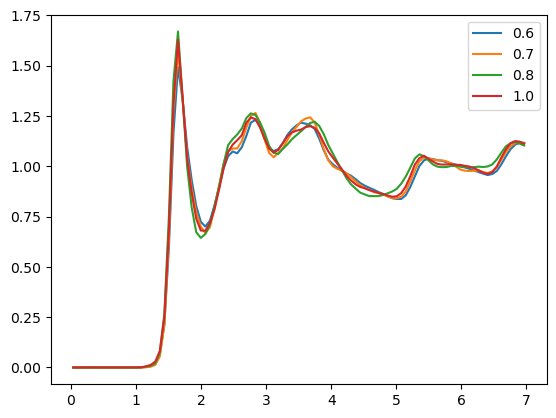

In [7]:
fig = plt.figure()
for ti_ratio, jobs in project.find_jobs().groupby("ekk_weight"):
    for job in jobs:
        rdf, N = gsd_rdf(
            gsdfile=job.fn("sim_traj.gsd"),
            start=-50,
            stop=-1,
            A_name="E",
            B_name="K",
            r_max=7
        )
        plt.plot(rdf.bin_centers, rdf.rdf * N, label=ti_ratio)
    
plt.legend()
plt.show()

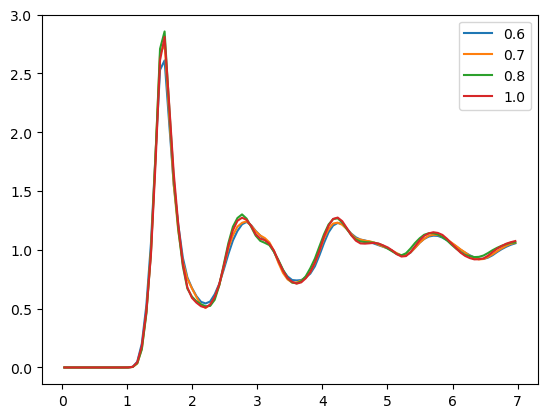

In [8]:
fig = plt.figure()
for ti_ratio, jobs in project.find_jobs().groupby("ekk_weight"):
    for job in jobs:
        rdf, N = gsd_rdf(
            gsdfile=job.fn("sim_traj.gsd"),
            start=-50,
            stop=-1,
            A_name="K",
            B_name="K",
            r_max=7
        )
        plt.plot(rdf.bin_centers, rdf.rdf * N, label=ti_ratio)
    
plt.legend()
plt.show()